<Figure size 640x480 with 0 Axes>

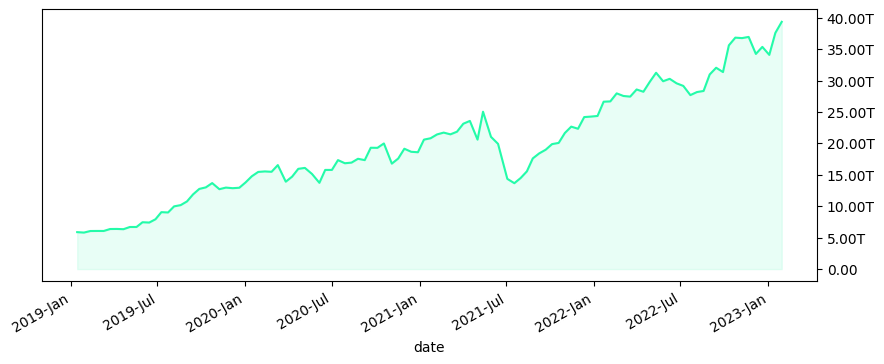

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, date
import matplotlib.ticker as mticker

df = pd.read_csv('bts_dif.csv')
df['timestamp'] = df['timestamp'].apply(lambda x: datetime.fromtimestamp(x))
df = df[(df['timestamp'] >= datetime.fromisoformat('2019-01-01')) & (df['timestamp'] <= datetime.fromisoformat('2023-01-31'))]



df['Bitcoin_mining_difficulty'] = df['diff']


x = df['timestamp']
y1 = df['Bitcoin_mining_difficulty'].ffill()

fig = plt.figure()
fig, ax = plt.subplots(figsize=(10,4))



ax.set_xlabel('date')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
fig.autofmt_xdate()

ax.plot(x, y1, label='Bitcoin_mining_difficulty', color = (36/255, 251/255, 169/255))
ax.fill_between(x, y1, color = (36/255, 251/255, 169/255), alpha = 0.1)

# format number to a more readable form
def human_format(num):
    magnitude = 0
    while abs(num) >= 100:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.2f%s' % (num, ['', 'K', 'M', 'bn', 'T', 'TT'][magnitude])

ticks_loc = ax.get_yticks().tolist();
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc));
ax.set_yticklabels([human_format(x) for x in ticks_loc]);
ticks_loc = ax.get_yticks().tolist();
ax.yaxis.tick_right()